In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from cascade_utils import *

In [54]:
ACC = 'acc'
speed_soft_caps = [1, 10, 100]  # speed beyond this value is penalized exponentially, contributes less
weights = [-1, 0.01]  # aka: For every 1% error increase, speed must increase by 100% to compensate

pairs = [
    ['WE', 0.9762, 1],  # acc, inf speed
    ['T=0.9', 0.9743, 5.569],  # thresh 0.9
    ['T=0.6', 0.9494, 10.123],  # thresh 0.6
    ['KNN', 0.8694, 72.14],  # KNN
    ['FastAI', 0.92227, 113.51],  # FastAI
    ['BRand', 0.52, 1000]
]

model_df = pd.DataFrame(pairs, columns=[MODEL, ACC, SPEED])
model_df = model_df.set_index(keys=MODEL, drop=True)
model_df[ERROR] = 1.0 - model_df[ACC]  # Different for each metric...
print(model_df)
model_df_out = rescale_by_pareto_frontier_model(model_df=model_df, speed_soft_cap=100, metric_name=ACC, weights=weights, random_guess_perf=0.5)
print(model_df_out)

            acc     speed    error
model                             
WE      0.97620     1.000  0.02380
T=0.9   0.97430     5.569  0.02570
T=0.6   0.94940    10.123  0.05060
KNN     0.86940    72.140  0.13060
FastAI  0.92227   113.510  0.07773
BRand   0.52000  1000.000  0.48000
            acc     speed    error  error_norm  speed_adjusted   goodness
model                                                                    
WE      0.97620     1.000  0.04760    0.002499        0.000000  -0.002499
T=0.9   0.97430     5.569  0.05140    0.082541        4.569000  -0.036851
T=0.6   0.94940    10.123  0.10120    1.131680        9.123000  -1.040450
KNN     0.86940    72.140  0.26120    4.505072       71.140000  -3.793672
FastAI  0.92227   113.510  0.15546    2.275170      104.503412  -1.230136
BRand   0.52000  1000.000  0.96000   20.368067      199.000000 -18.378067


Text(0.5, 1.0, 'error_norm')

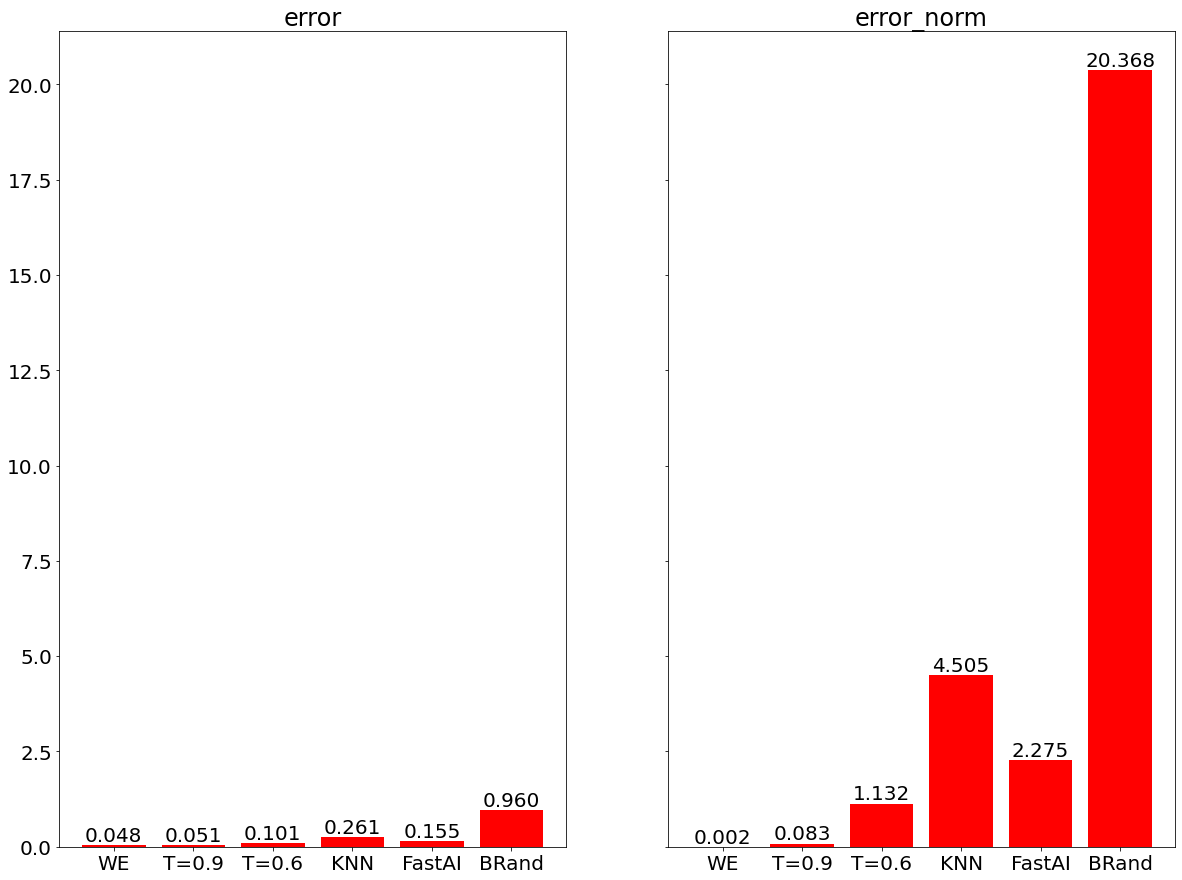

In [55]:
plt.rcParams["font.size"] = "20"
fig, axs = plt.subplots(1, 2, figsize=(20, 15), sharey=True)

bars = axs[0].bar(model_df_out.index, model_df_out['error'], color='red')
axs[0].bar_label(bars, fmt='%.3f')
axs[0].set_title('error')

bars = axs[1].bar(model_df_out.index, model_df_out['error_norm'], color='red')
axs[1].bar_label(bars, fmt='%.3f')
axs[1].set_title('error_norm')

Text(0.5, 1.0, 'speed_adj')

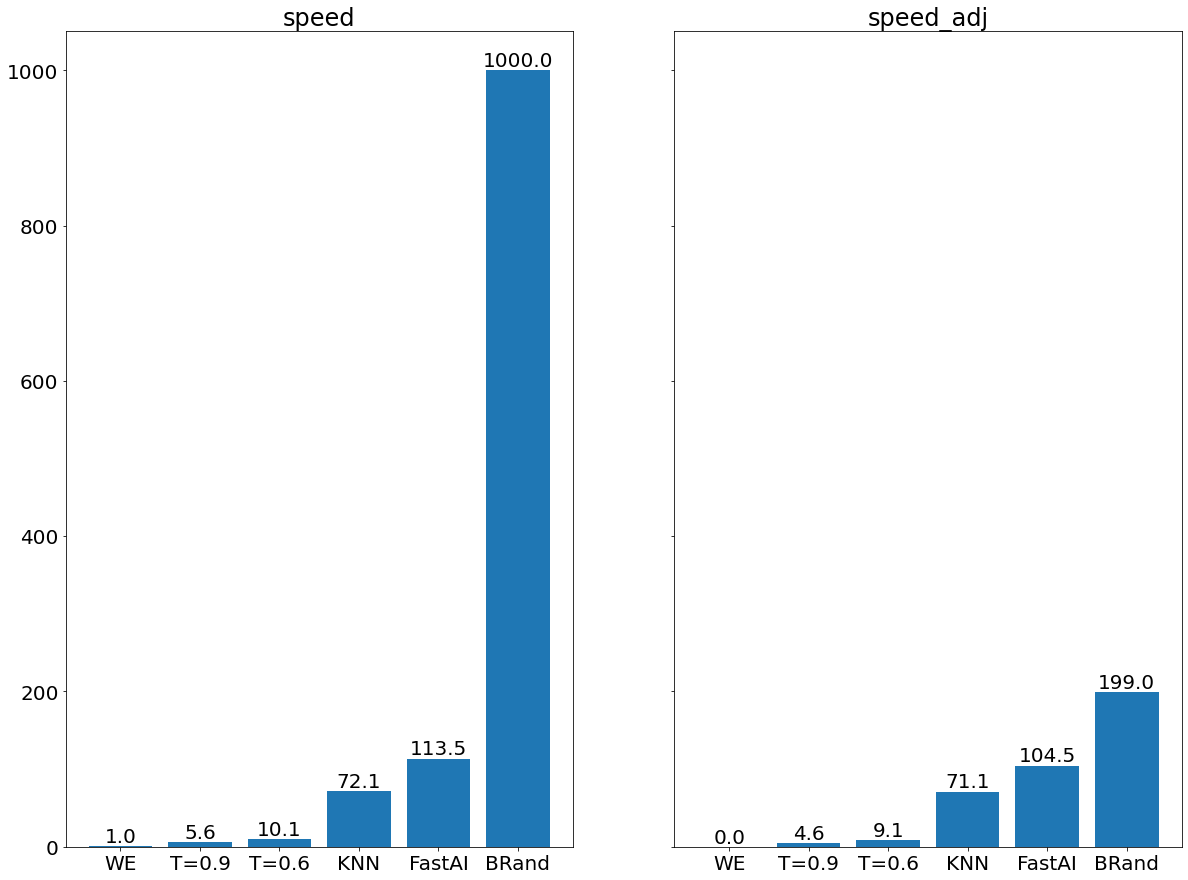

In [56]:
plt.rcParams["font.size"] = "20"
fig, axs = plt.subplots(1, 2, figsize=(20, 15), sharey=True)

bars = axs[0].bar(model_df_out.index, model_df_out['speed'])
axs[0].bar_label(bars, fmt='%.1f')
axs[0].set_title('speed')

bars = axs[1].bar(model_df_out.index, model_df_out['speed_adjusted'])
axs[1].bar_label(bars, fmt='%.1f')
axs[1].set_title('speed_adj')

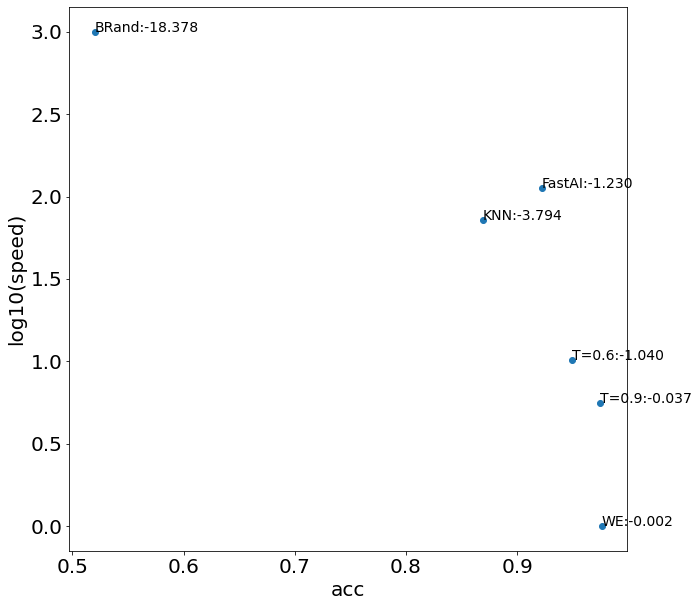

In [111]:
plt.rcParams["font.size"] = "20"
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(model_df_out['acc'], np.log10(model_df_out['speed']))
ax.set_xlabel('acc')
ax.set_ylabel('log10(speed)')
for i, (model_name, goodness) in enumerate(zip(model_df_out.index, model_df_out['goodness'])):
    txt = f'{model_name}:{goodness:.3f}'
    plt.text(model_df_out['acc'].iloc[i], np.log10(model_df_out['speed'].iloc[i]), txt, fontsize=14)

In [137]:
exp_df = pd.read_csv('../ExpResults/Inc/ag-20220601_Inc_medium_quality.csv')
ACC = 'score_val'
exp_df[ERROR] = 1.0 - exp_df[ACC]
exp_df_out = rescale_by_pareto_frontier_model(model_df=exp_df, speed_soft_cap=1000, metric_name=ACC, weights=weights, random_guess_perf=0.5)
exp_df_out = exp_df_out.set_index('model')
# TODO: find out what happened with ERROR. It is strange
exp_df_out[[ACC, SPEED, ERROR, ERROR_NORM, SPEED_ADJUSTED, 'goodness']]

,score_val,speed,error,error_norm,speed_adjusted,goodness
model,,,,,,
WeightedEnsemble_L2,0.941762,63693.103711,0.116475,0.007180,0.199727,-0.005183
XGBoost,0.940494,211601.833194,0.119011,0.029131,0.422818,-0.024902
CatBoost,0.939291,263531.029080,0.121418,0.049957,0.463598,-0.045321
LightGBM,0.938331,178005.840722,0.123337,0.066573,0.390693,-0.062666
LightGBMLarge,0.936672,157320.419796,0.126657,0.095307,0.367740,-0.091630
LightGBMXT,0.934917,77372.209588,0.130166,0.125685,0.235877,-0.123326
NeuralNetFastAI,0.920753,21740.835645,0.158495,0.370981,0.000000,-0.370981
RandomForestEntr,0.918439,31559.341469,0.163122,0.411060,0.069248,-0.410368
RandomForestGini,0.917448,37064.617036,0.165104,0.428229,0.099125,-0.427238


In [134]:
exp_df

,model,pred_time_test,speed,roc_auc,accuracy,pred_time_val,score_val,goodness,error
0,WeightedEnsemble_L2,0.153376,63693.103711,0.931361,0.876548,0.072725,0.941762,-0.006515,0.058238
1,XGBoost,0.046167,211601.833194,0.932111,0.875115,0.014097,0.940494,-0.025469,0.059506
2,CatBoost,0.037070,263531.029080,0.931983,0.876855,0.014843,0.939291,-0.046390,0.060709
3,LightGBM,0.054880,178005.840722,0.930059,0.872351,0.014628,0.938331,-0.062979,0.061669
4,LightGBMLarge,0.062096,157320.419796,0.930530,0.873784,0.013664,0.936672,-0.091589,0.063328
5,LightGBMXT,0.126260,77372.209588,0.928219,0.871430,0.028093,0.934917,-0.123283,0.065083
6,NeuralNetFastAI,0.449339,21740.835645,0.916767,0.859146,0.036300,0.920753,-0.369047,0.079247
7,RandomForestEntr,0.309544,31559.341469,0.911574,0.858225,0.101223,0.918439,-0.410999,0.081561
8,RandomForestGini,0.263567,37064.617036,0.911422,0.858532,0.100882,0.917448,-0.428162,0.082552
9,NeuralNetTorch,0.197037,49579.465240,0.913187,0.854847,0.044751,0.916701,-0.439625,0.083299


Text(0.5, 1.0, 'error_norm')

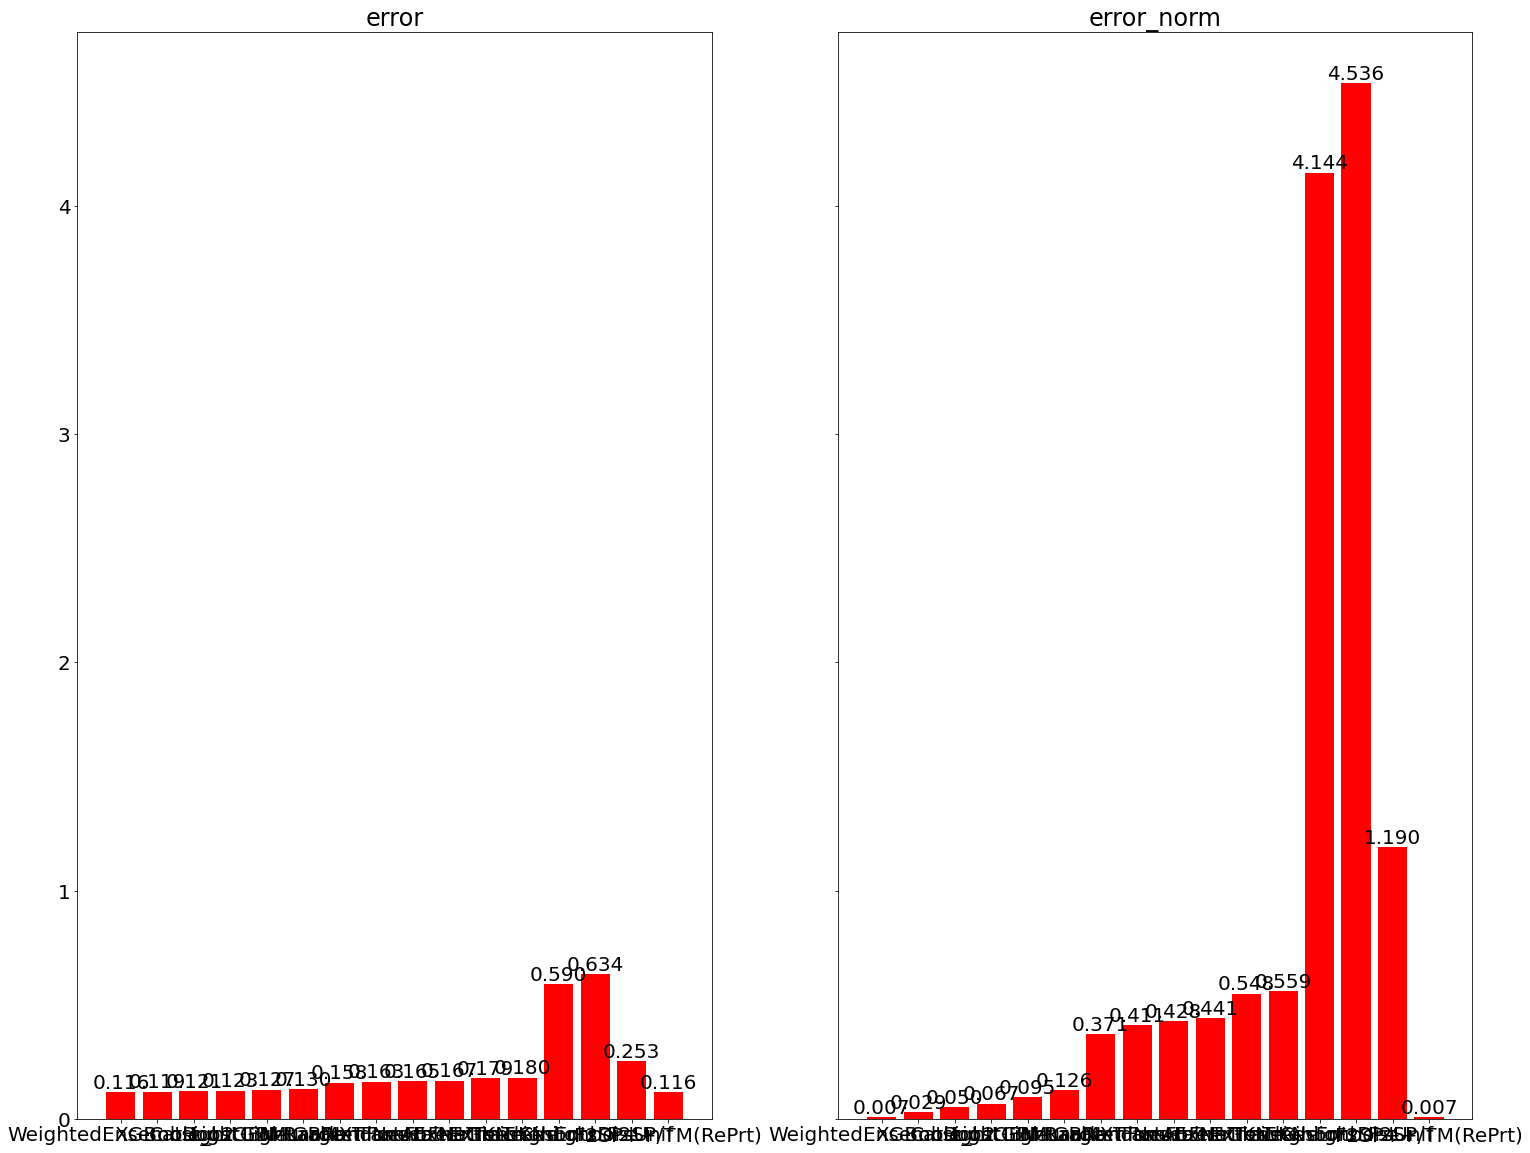

In [127]:
model_df_out = exp_df_out
plt.rcParams["font.size"] = "20"
fig, axs = plt.subplots(1, 2, figsize=(25, 20), sharey=True)

bars = axs[0].bar(model_df_out.index, model_df_out['error'], color='red')
axs[0].bar_label(bars, fmt='%.3f')
axs[0].set_title('error')

bars = axs[1].bar(model_df_out.index, model_df_out['error_norm'], color='red')
axs[1].bar_label(bars, fmt='%.3f')
axs[1].set_title('error_norm')

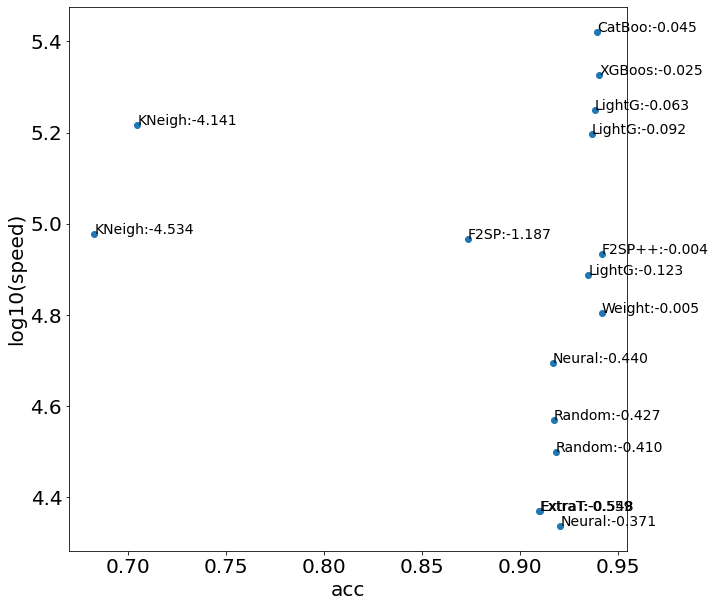

In [124]:
plt.rcParams["font.size"] = "20"
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(exp_df_out[ACC], np.log10(exp_df_out['speed']))
ax.set_xlabel('acc')
ax.set_ylabel('log10(speed)')
for i, (model_name, goodness) in enumerate(zip(exp_df_out.index, exp_df_out['goodness'])):
    txt = f'{model_name[:6]}:{goodness:.3f}'
    plt.text(exp_df_out[ACC].iloc[i], np.log10(exp_df_out['speed'].iloc[i]), txt, fontsize=14)